In [1]:
# ** CHEQUEAR QUÉ LIBRERIAS ESTOY Y NO ESTOY USANDO** 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
#dust_file='Dust records corregidos 15-05-22.xlsx' #Base de datos sin valores repetidos, No uniforme
dust_file='Holocene Dust.xlsx'  #Base de datos 10k, no uniforme. 


#temp_file='Temps records corregidos 15-05-22.xlsx' #Base de datos sin valores repetidos, No uniforme
#temp_file='Temps records uniformes 130k.xlsx' #Base de datos sin valores repetidos, No uniforme

In [3]:
id_columns=['Name','Data id','Latitud','Longitud','Age units','Data units','Data length']


id_data=pd.read_excel(dust_file,sheet_name=0,usecols=id_columns)
#id_data=pd.read_excel(temp_file,sheet_name=0,usecols=id_columns)
#id_data.head()

df_data=pd.read_excel(dust_file,sheet_name=1,skiprows=1)
#df_data=pd.read_excel(temp_file,sheet_name=1,skiprows=1)
df_data.head()

,Year,DustFlux,Year.1,DustFlux.1,Year.2,nssCa2 flux,Year.3,Ca2+,Year.4,Lithogenic,...,Year.7,DustFlux.4,Year.8,DustFlux.5,Year.9,MAR,Year.10,DustConc,Year.11,Ca2+.1
0,4.509,602.784,0.375,0.259,1.202,1528.388706,3.791,0.100000,0.620575,6.380517,...,6.494265,0.098728,1.15,238095.24,0.0,10.72,5.00,305.363666,7.8006,12.8
1,4.552,423.903,0.400,0.329,1.203,2032.857113,3.792,1.050000,0.827434,7.131424,...,7.162711,0.085866,2.20,238095.24,2.0,10.40,5.05,471.395055,7.8058,13.2
2,4.690,299.095,0.425,0.652,1.204,4912.886973,3.793,0.616667,1.034292,7.741062,...,7.521446,0.084138,3.25,277777.78,4.0,8.57,5.10,266.747998,7.8111,13.6
3,5.259,734.449,0.450,0.341,1.205,8533.933273,3.794,0.050000,1.241151,7.877875,...,7.846931,0.087230,4.15,265957.45,6.0,7.80,5.15,252.657484,7.8163,17.2
4,5.674,603.242,0.475,0.312,1.206,4206.537792,3.795,0.866667,1.448009,7.512894,...,8.156088,0.087368,5.09,263157.89,8.0,7.98,5.20,338.667402,7.8215,16.4


In [4]:
#SEPARAR CADA UNA DE LAS COLUMNAS v.2
columns=df_data.size/len(df_data) #data.size = nxm ; len(data) = n -> cuociente = m = n°columnas
lis=[] #Lista de dupla de dataframes: Age & Values
new_length=np.array([])

for i in range(int(columns)):
    if (i+1)%2==1: #División completa, voy de 2 en 2
        dupla=df_data[[df_data.columns[i],df_data.columns[i+1]]][:id_data['Data length'][int(i/2)]]
        dupla.index=[j for j in range(0, len(dupla))] 
        lis.append(dupla)
        new_length=np.append(new_length,np.shape(dupla)[0])

In [44]:
for i in range(len(lis)):
    print(len(lis[i]))

250


In [5]:
## ACA ELIJO CON CUAL PROXY VOY A TRABAJAR
dataset=1
n=dataset-1 #de python -> n+1 id dataset

original_age_dust=lis[n][lis[n].columns[0]]
original_values_dust=lis[n][lis[n].columns[1]]

#########################################
d_nan=original_values_dust.isna()
nan_in_row=[]
for i in d_nan:
    if i==False:
        nan_in_row.append(0)
    else:
        nan_in_row.append(1)
#########################################


#contador de nan's in row
aux=[]
contador_de_nans=0
for i in range(len(d_nan)):
    if d_nan[i]==True:
        contador_de_nans+=1
    if d_nan[i]==False and contador_de_nans!=0:
        #aux.append(0)
        aux.append(contador_de_nans)
        contador_de_nans=0
#########################################

new_dataset=[original_values_dust[n]] #n en vez de 0
indice_aux=0
indice_borrador=0

for i in range(1,len(nan_in_row)):
    if nan_in_row[i]==0:
        new_dataset.append(original_values_dust[i])
    if nan_in_row[i]==1:
        #print(i-1,'    ',i+aux[indice_aux])
        #print(indice_aux)
        try:            
            x = np.array([original_age_dust[i-1],original_age_dust[i+aux[indice_aux]]])#tomo el valo anterior y el siguiente
            y = np.array([original_values_dust[i-1],original_values_dust[i+aux[indice_aux]]])#tomo el valo anterior y el siguiente
            new_points=aux[indice_aux]
            f2=interp1d(x, y, kind='linear')
            xnew = np.linspace(x.min(), x.max(), num=int(new_points)+1, endpoint=False)
            points=f2(xnew)
            for p in range(1,len(points)):
                new_dataset.append(points[p])
            for j in range(1,aux[indice_aux]):
                nan_in_row[i+j]=2
            indice_aux+=1
            
        except:
            print('error en intervalo',i,'      [',i-1,' - ',i+aux[-1],']')
            print('len aux: ',len(aux))
            print('indice aux: ',indice_aux,'\n')
            indice_aux+=1    

print(len(original_values_dust))
print(len(new_dataset))      

14
14


In [6]:
#guardar los datos
dust1_interpolado=pd.DataFrame(new_dataset, columns = ['values'])
dust1_interpolado.to_excel('dust1_interpolado.xlsx')

In [17]:
#temp7_interpolado=pd.DataFrame(new_dataset, columns = ['values'])
#temp7_interpolado.to_excel('temp7_interpolado.xlsx')

### Cuando tira error pruebo con este

In [6]:
dust_file='DustError6.xlsx'  #Base de datos sin valores repetidos, Uniforme
df_data=pd.read_excel(dust_file,sheet_name=0,skiprows=0)

In [7]:
df_data[df_data.columns[1]]

0      0.118887
1      0.136488
2      0.117742
3      0.111854
4      0.110440
         ...   
456    0.198861
457    0.238710
458    0.239869
459    0.237982
460    0.253443
Name: valor, Length: 461, dtype: float64

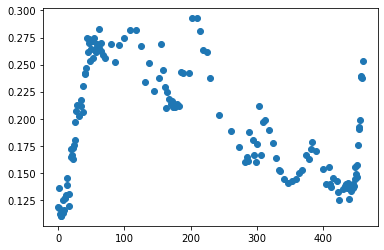

In [8]:
plt.plot(df_data[df_data.columns[1]],'o')

In [9]:
## ACA ELIJO CON CUAL PROXY VOY A TRABAJAR
dataset=6
n=dataset-1 #de python -> n+1 id dataset

original_age_dust=df_data[df_data.columns[0]]
original_values_dust=df_data[df_data.columns[1]]


In [10]:
original_values_dust

0      0.118887
1      0.136488
2      0.117742
3      0.111854
4      0.110440
         ...   
456    0.198861
457    0.238710
458    0.239869
459    0.237982
460    0.253443
Name: valor, Length: 461, dtype: float64

In [11]:


#########################################
d_nan=original_values_dust.isna()
nan_in_row=[]
for i in d_nan:
    if i==False:
        nan_in_row.append(0)
    else:
        nan_in_row.append(1)
#########################################


#contador de nan's in row
aux=[]
contador_de_nans=0
for i in range(len(d_nan)):
    if d_nan[i]==True:
        contador_de_nans+=1
    if d_nan[i]==False and contador_de_nans!=0:
        #aux.append(0)
        aux.append(contador_de_nans)
        contador_de_nans=0
#########################################

new_dataset=[original_values_dust[n]] #n en vez de 0
indice_aux=0
indice_borrador=0

for i in range(1,len(nan_in_row)):
    if nan_in_row[i]==0:
        new_dataset.append(original_values_dust[i])
    if nan_in_row[i]==1:
        #print(i-1,'    ',i+aux[indice_aux])
        #print(indice_aux)
        try:            
            x = np.array([original_age_dust[i-1],original_age_dust[i+aux[indice_aux]]])#tomo el valo anterior y el siguiente
            y = np.array([original_values_dust[i-1],original_values_dust[i+aux[indice_aux]]])#tomo el valo anterior y el siguiente
            new_points=aux[indice_aux]
            f2=interp1d(x, y, kind='linear')
            xnew = np.linspace(x.min(), x.max(), num=int(new_points)+1, endpoint=False)
            points=f2(xnew)
            for p in range(1,len(points)):
                new_dataset.append(points[p])
            for j in range(1,aux[indice_aux]):
                nan_in_row[i+j]=2
            indice_aux+=1
            
        except:
            print('error en intervalo',i+3,'      [',i+3-1,' - ',i+aux[-1],']   de excel')
            print('len aux: ',len(aux))
            print('indice aux: ',indice_aux,'\n')
            indice_aux+=1    

print(len(original_values_dust))
print(len(new_dataset))   

461
461


In [12]:
dust6_interpolado=pd.DataFrame(new_dataset, columns = ['values'])
dust6_interpolado.to_excel('dust6_interpolado.xlsx')